In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [2]:
import yfinance as yf
import datetime 
from datetime import date, timedelta

start_date = datetime.datetime(2015, 1, 1)
end_date  = datetime.datetime(2023, 8, 23)
tickers = ["GOOGL", "PANW", "AMZN", "BUD", "AAPL", "MSFT", "GME", "TSLA", "NFLX", "META", "WMT", "WBA", "NVDA"]
my_stocks = yf.download(tickers = ["GOOGL", "PANW", "AMZN", "BUD", "AAPL", "MSFT", "GME", "TSLA", "NFLX", "META", "WMT", "WBA", "NVDA"]
, start=start_date, end=end_date, group_by='tickers')
my_stocks.head(13)

my_stocks

[*********************100%%**********************]  13 of 13 completed


META                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2015-01-02   78.580002   78.930000   77.699997   78.449997   78.449997   
2015-01-05   77.980003   79.250000   76.860001   77.190002   77.190002   
2015-01-06   77.230003   77.589996   75.360001   76.150002   76.150002   
2015-01-07   76.760002   77.360001   75.820000   76.150002   76.150002   
2015-01-08   76.739998   78.230003   76.080002   78.180000   78.180000   
...                ...         ...         ...         ...         ...   
2023-08-16  300.200012  301.079987  294.279999  294.290009  294.290009   
2023-08-17  293.049988  296.049988  284.950012  285.089996  285.089996   
2023-08-18  279.029999  285.690002  274.380005  283.250000  283.250000   
2023-08-21  283.450012  290.500000  281.850006  289.899994  289.899994   
2023-08-22  292.549988  292.899994  286.750000  287.600006  287.600006   

                            NFLX                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2015-01-02  18177500   49.151428   50.331429   48.731430   49.848572  ...   
2015-01-05  26452200   49.258572   49.258572   47.147144   47.311428  ...   
2015-01-06  27399300   47.347141   47.639999   45.661430   46.501431  ...   
2015-01-07  22045300   47.347141   47.421429   46.271427   46.742859  ...   
2015-01-08  23961000   47.119999   47.835712   46.478573   47.779999  ...   
...              ...         ...         ...         ...         ...  ...   
2023-08-16  18547700  423.730011  424.510010  415.250000  415.450012  ...   
2023-08-17  23950100  415.000000  415.239990  401.579987  403.000000  ...   
2023-08-18  34061200  399.329987  406.519989  398.149994  404.529999  ...   
2023-08-21  20181500  402.230011  409.609985  399.500000  408.290009  ...   
2023-08-22  12999900  409.000000  415.739990  407.399994  413.170013  ...   

                  AMZN                                          NVDA  \
                   Low       Close   Adj Close    Volume        Open   
Date                                                                   
2015-01-02   15.348000   15.426000   15.426000  55664000    5.032500   
2015-01-05   15.042500   15.109500   15.109500  55484000    5.032500   
2015-01-06   14.619000   14.764500   14.764500  70380000    4.955000   
2015-01-07   14.766500   14.921000   14.921000  52806000    4.832500   
2015-01-08   14.805500   15.023000   15.023000  61768000    4.840000   
...                ...         ...         ...       ...         ...   
2023-08-16  135.009995  135.070007  135.070007  41675900  445.200012   
2023-08-17  133.529999  133.979996  133.979996  48354100  439.700012   
2023-08-18  131.149994  133.220001  133.220001  48469400  426.350006   
2023-08-21  132.710007  134.679993  134.679993  41442500  444.940002   
2023-08-22  133.729996  134.250000  134.250000  32935100  481.350006   

                                                                      
                  High         Low       Close   Adj Close    Volume  
Date                                                                  
2015-01-02    5.070000    4.952500    5.032500    4.833628  11368000  
2015-01-05    5.047500    4.925000    4.947500    4.751987  19795200  
2015-01-06    4.960000    4.792500    4.797500    4.607915  19776400  
2015-01-07    4.875000    4.770000    4.785000    4.595909  32180800  
2015-01-08    4.995000    4.837500    4.965000    4.768795  28378000  
...                ...         ...         ...         ...       ...  
2023-08-16  446.750000  434.059998  434.859985  434.859985  52745100  
2023-08-17  440.619995  430.010010  433.440002  433.440002  45239500  
2023-08-18  435.779999  416.600006  432.989990  432.989990  58262200  
2023-08-21  470.649994  442.220001  469.6

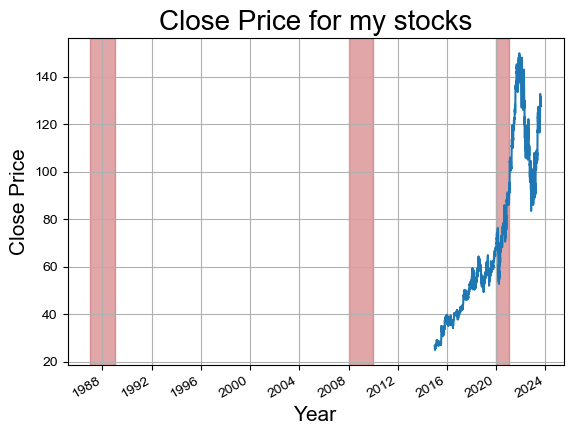

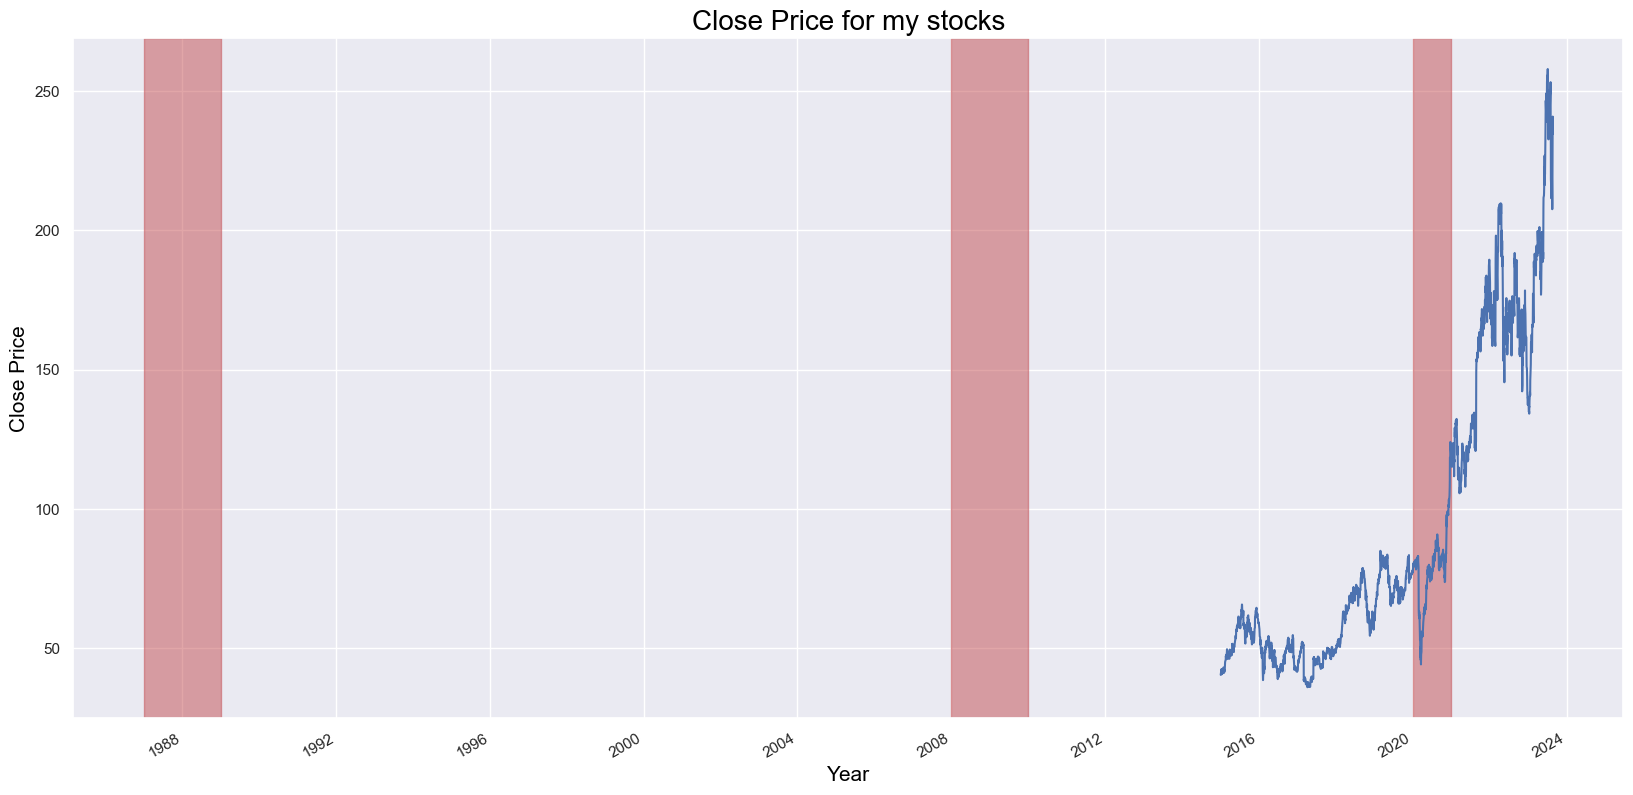

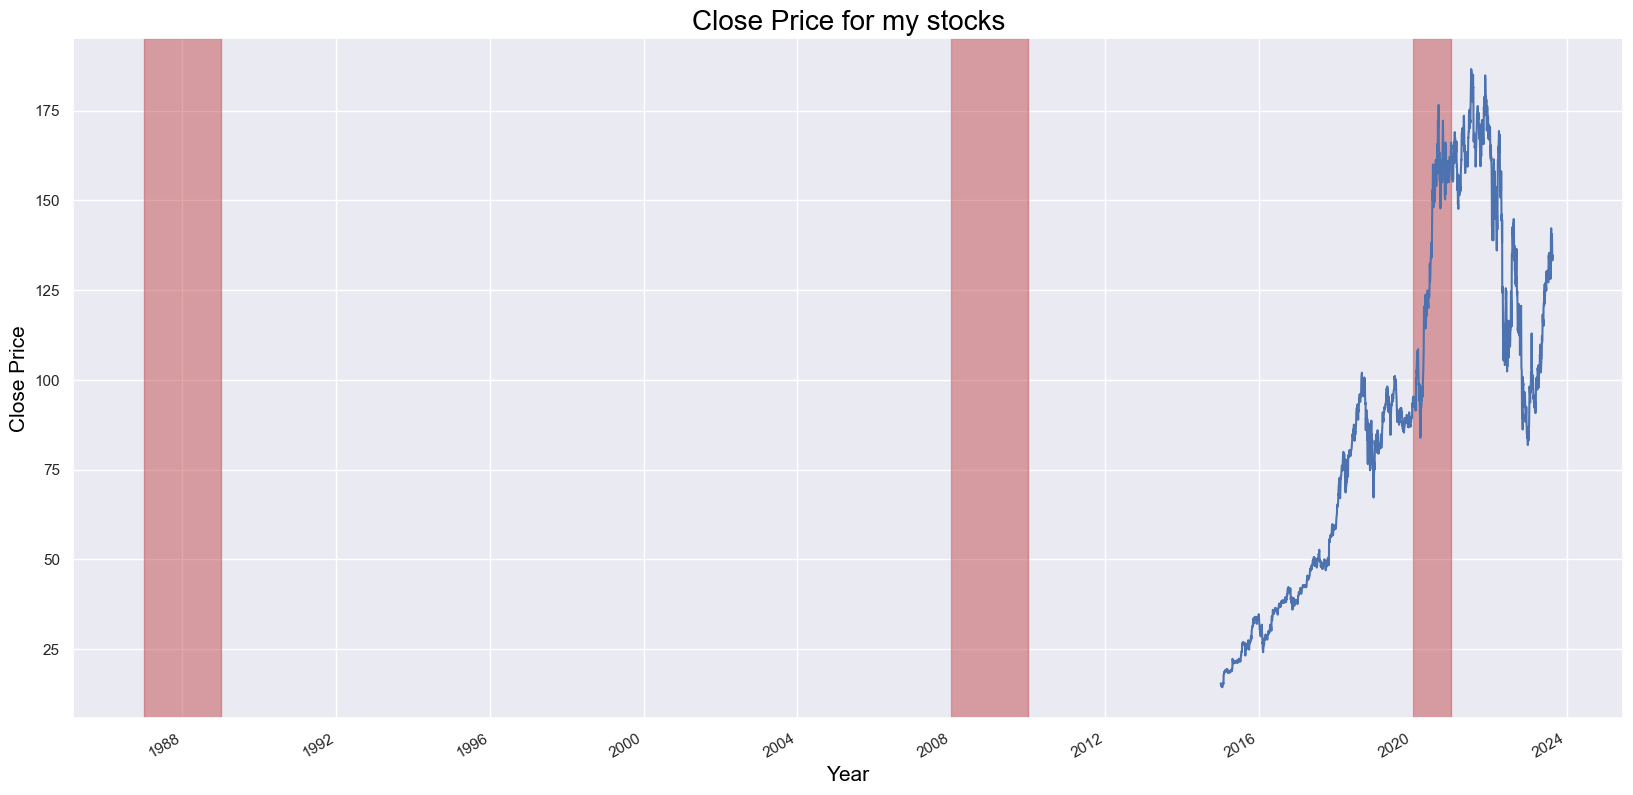

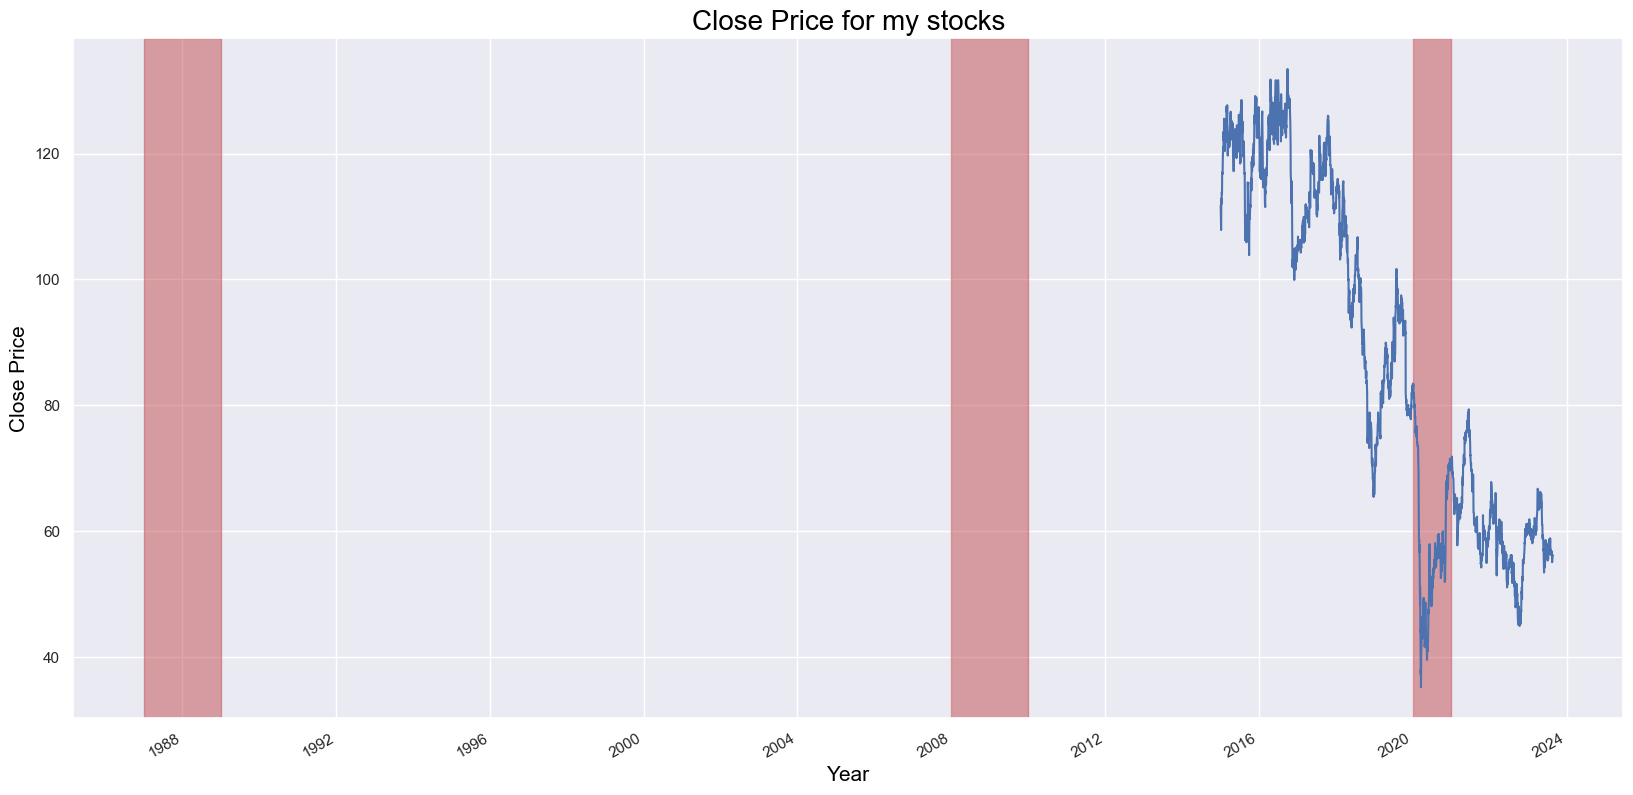

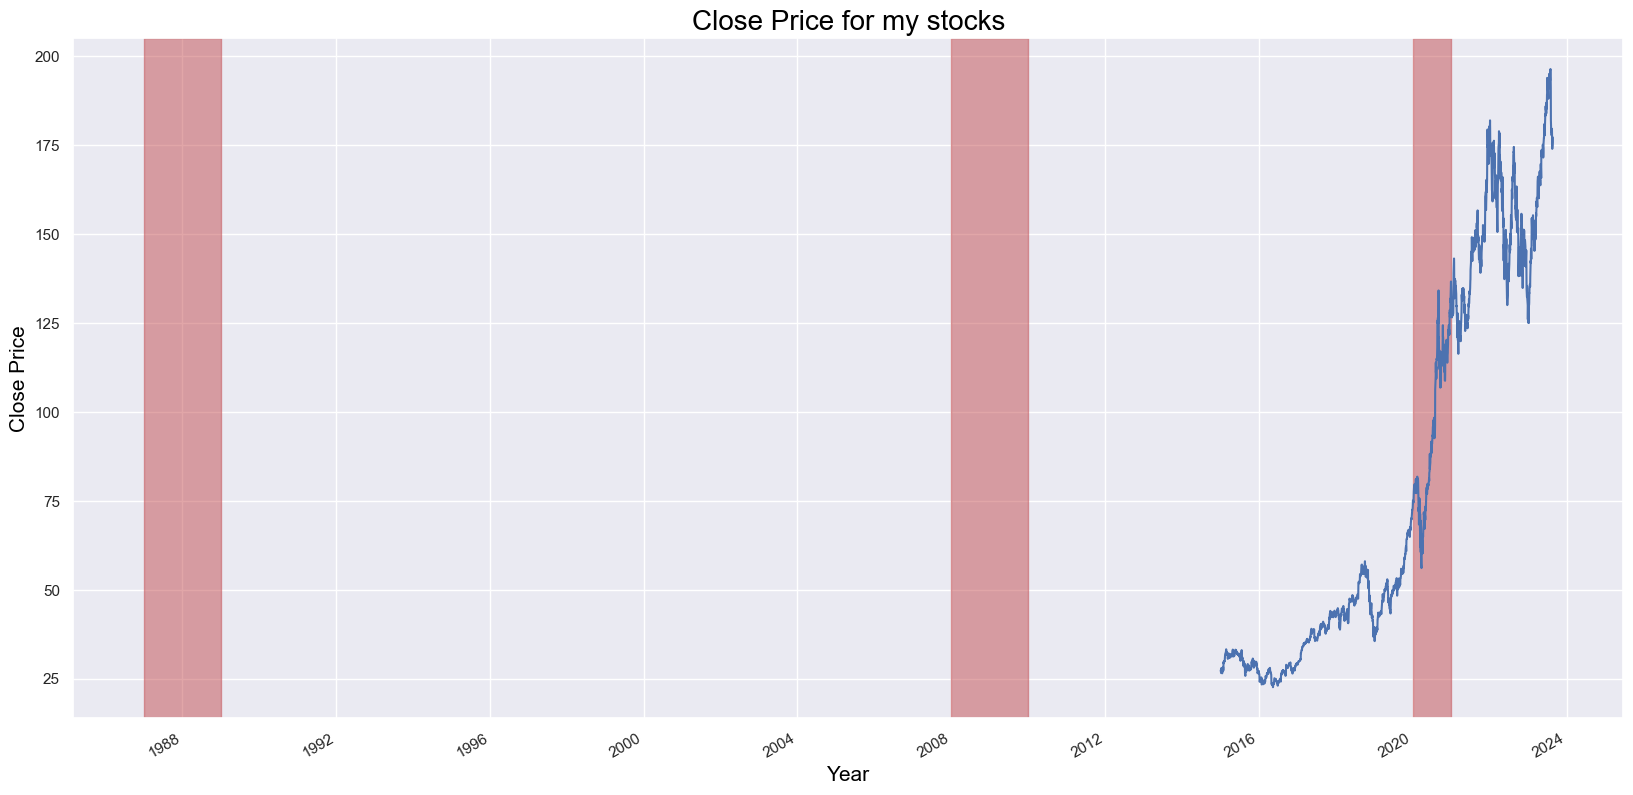

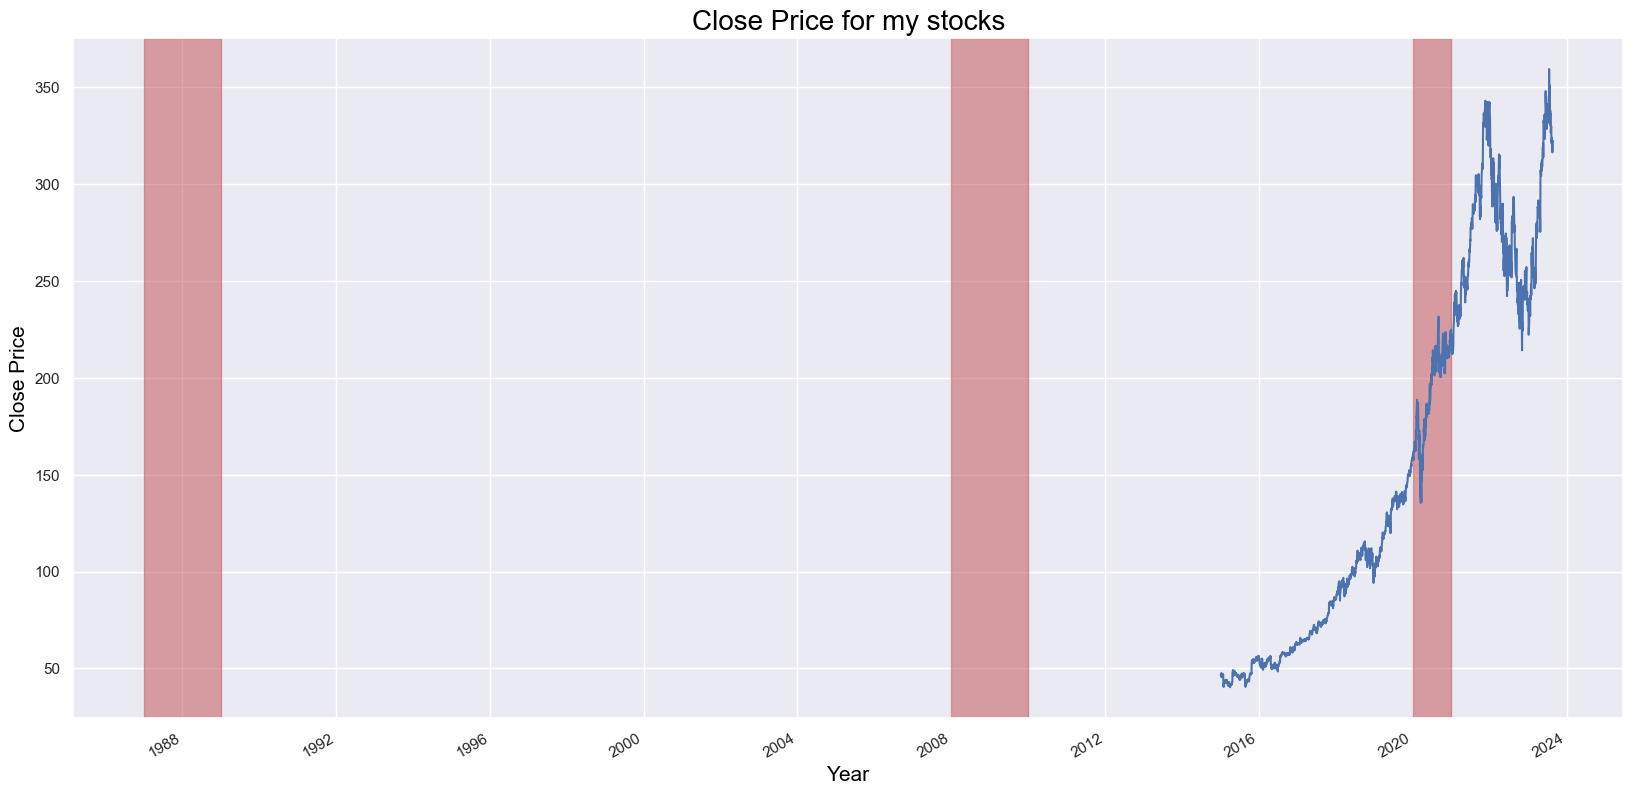

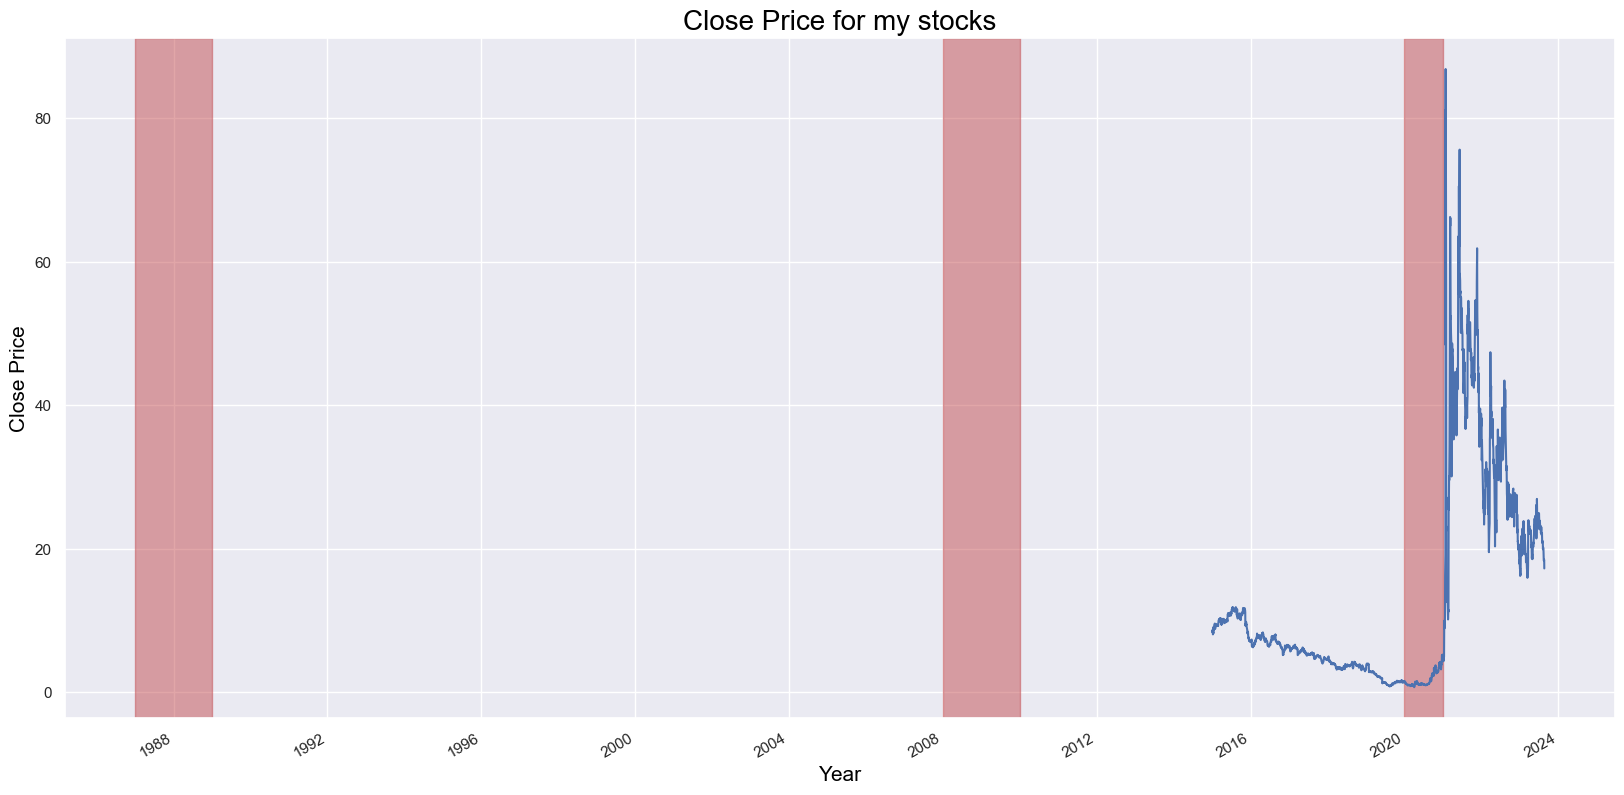

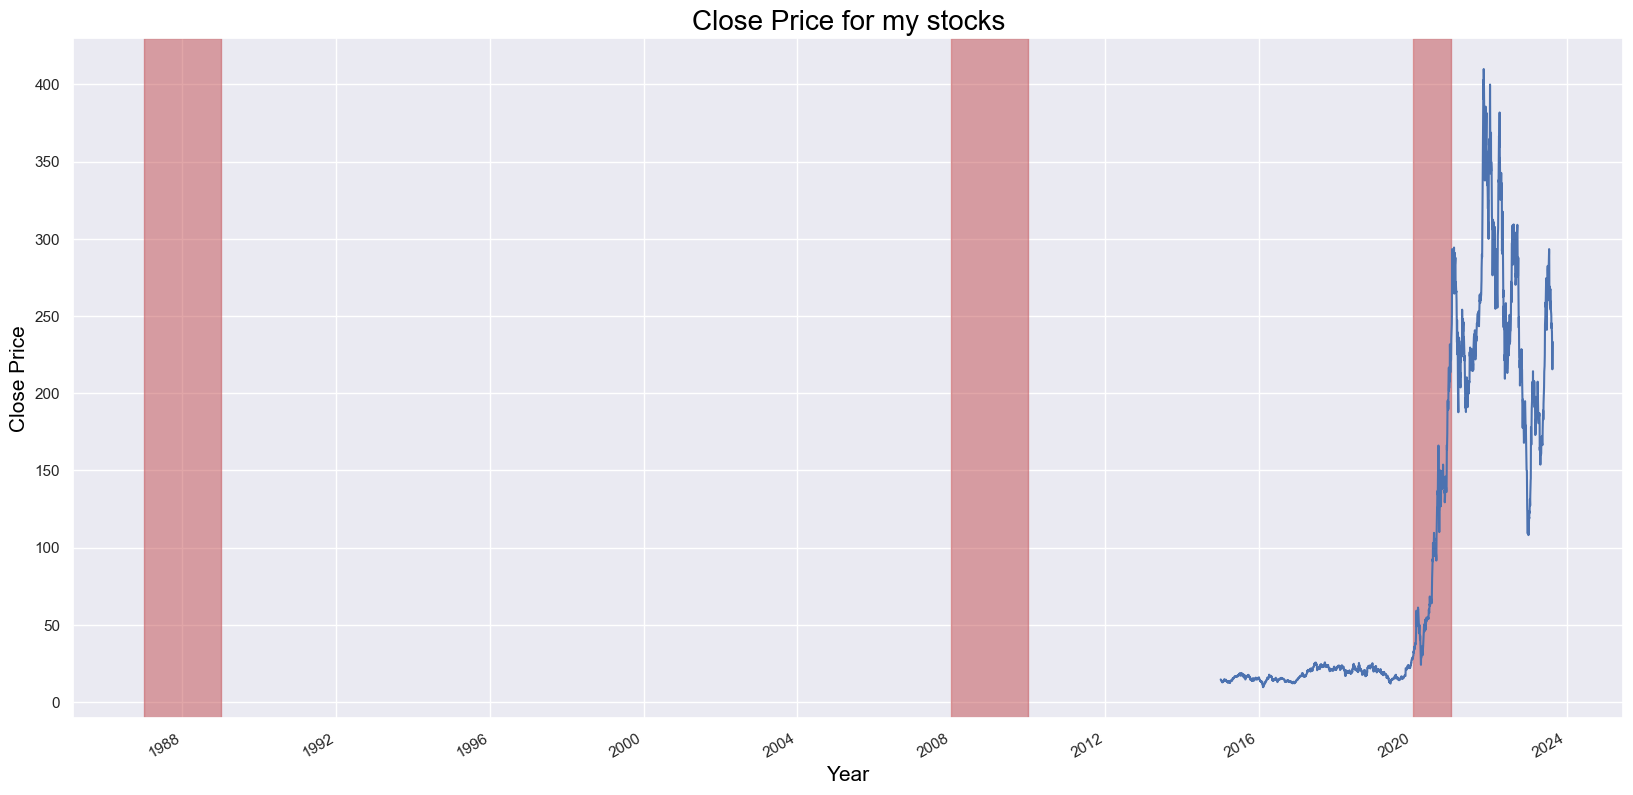

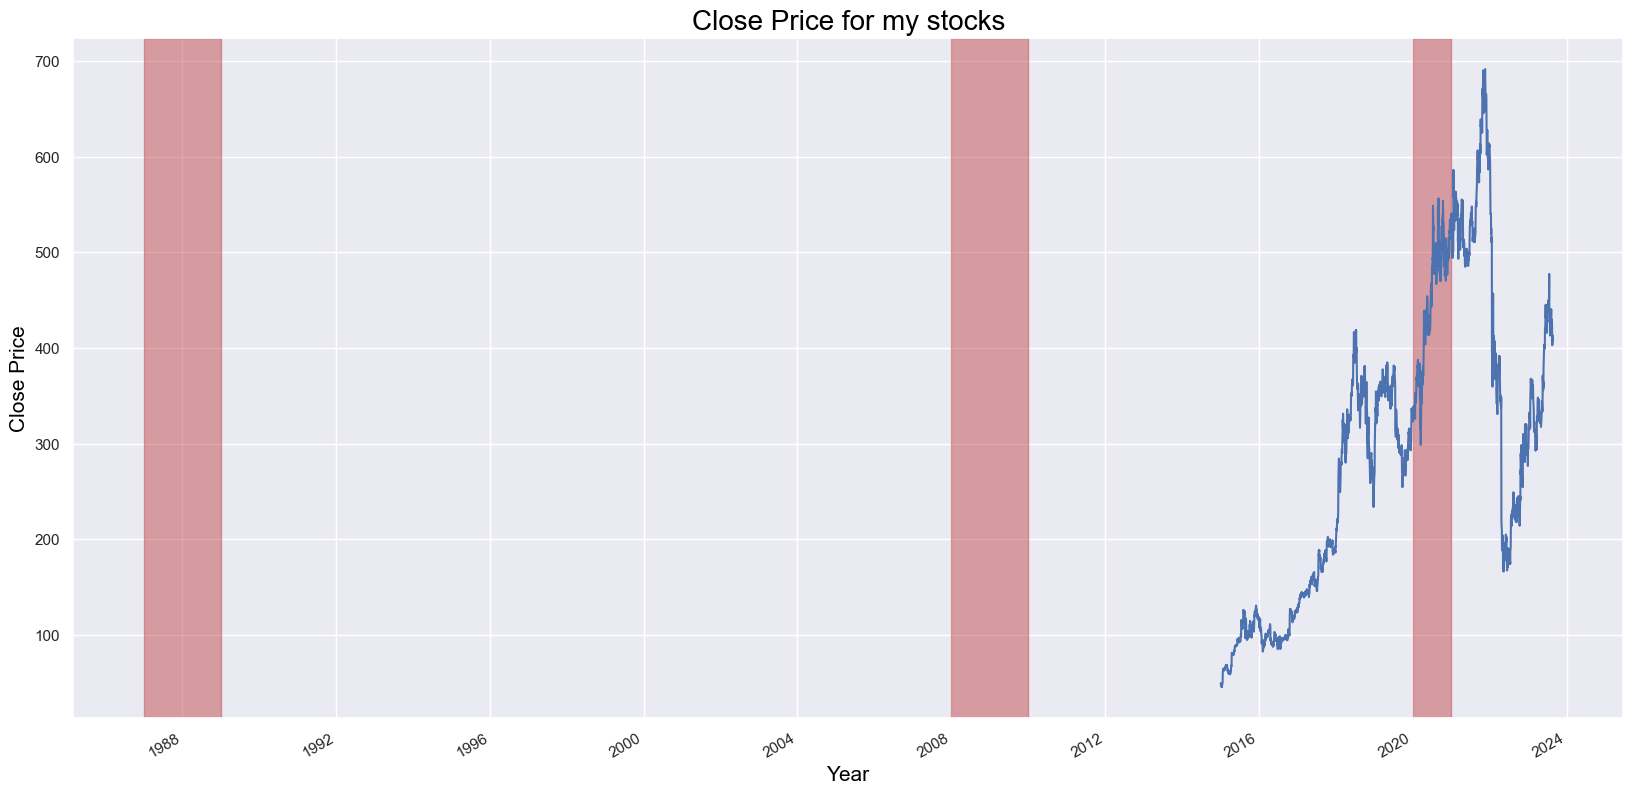

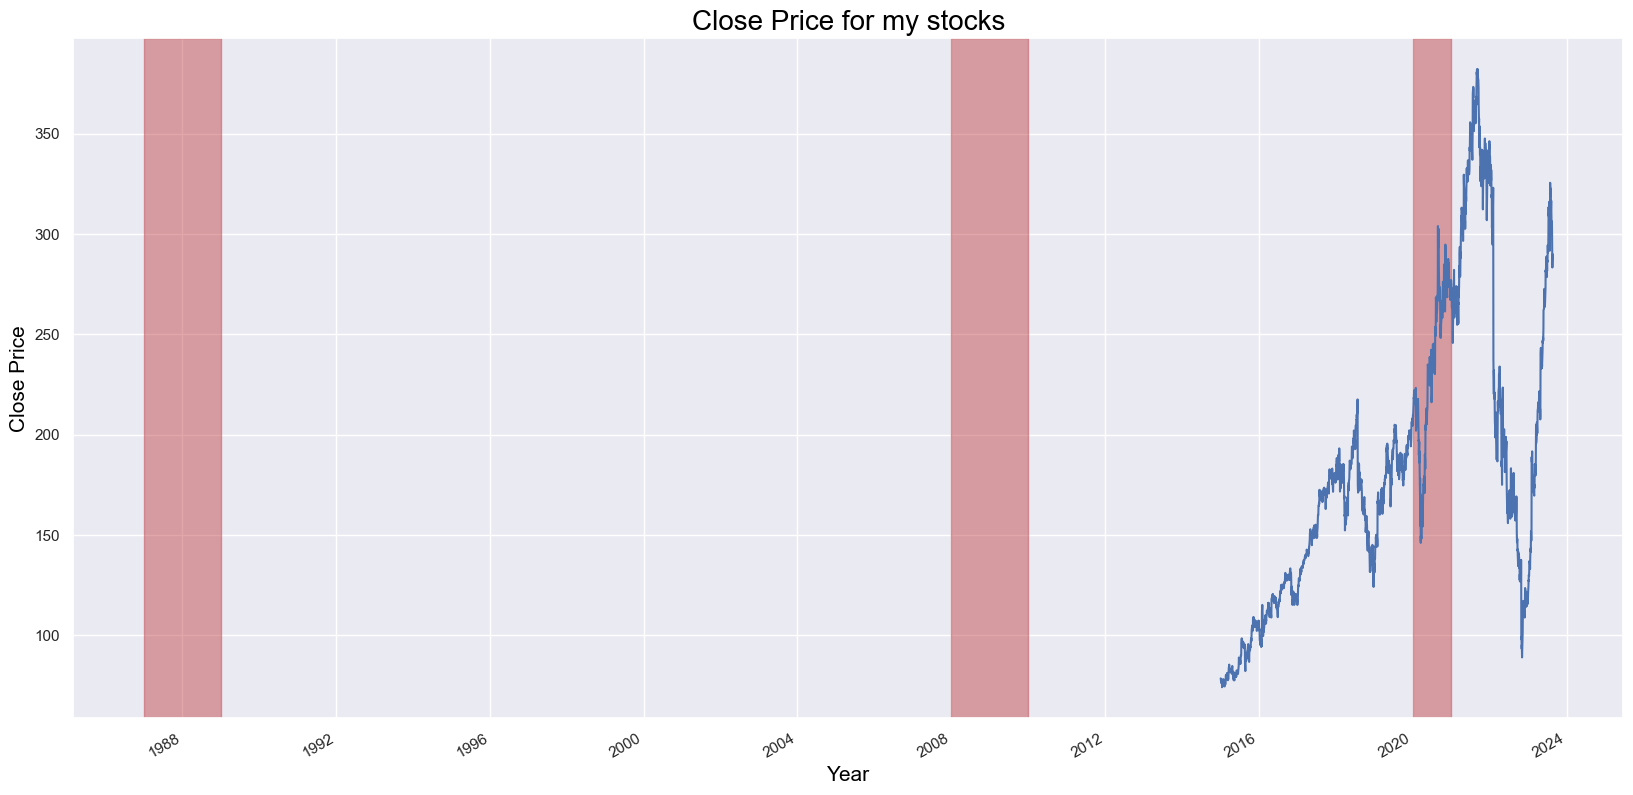

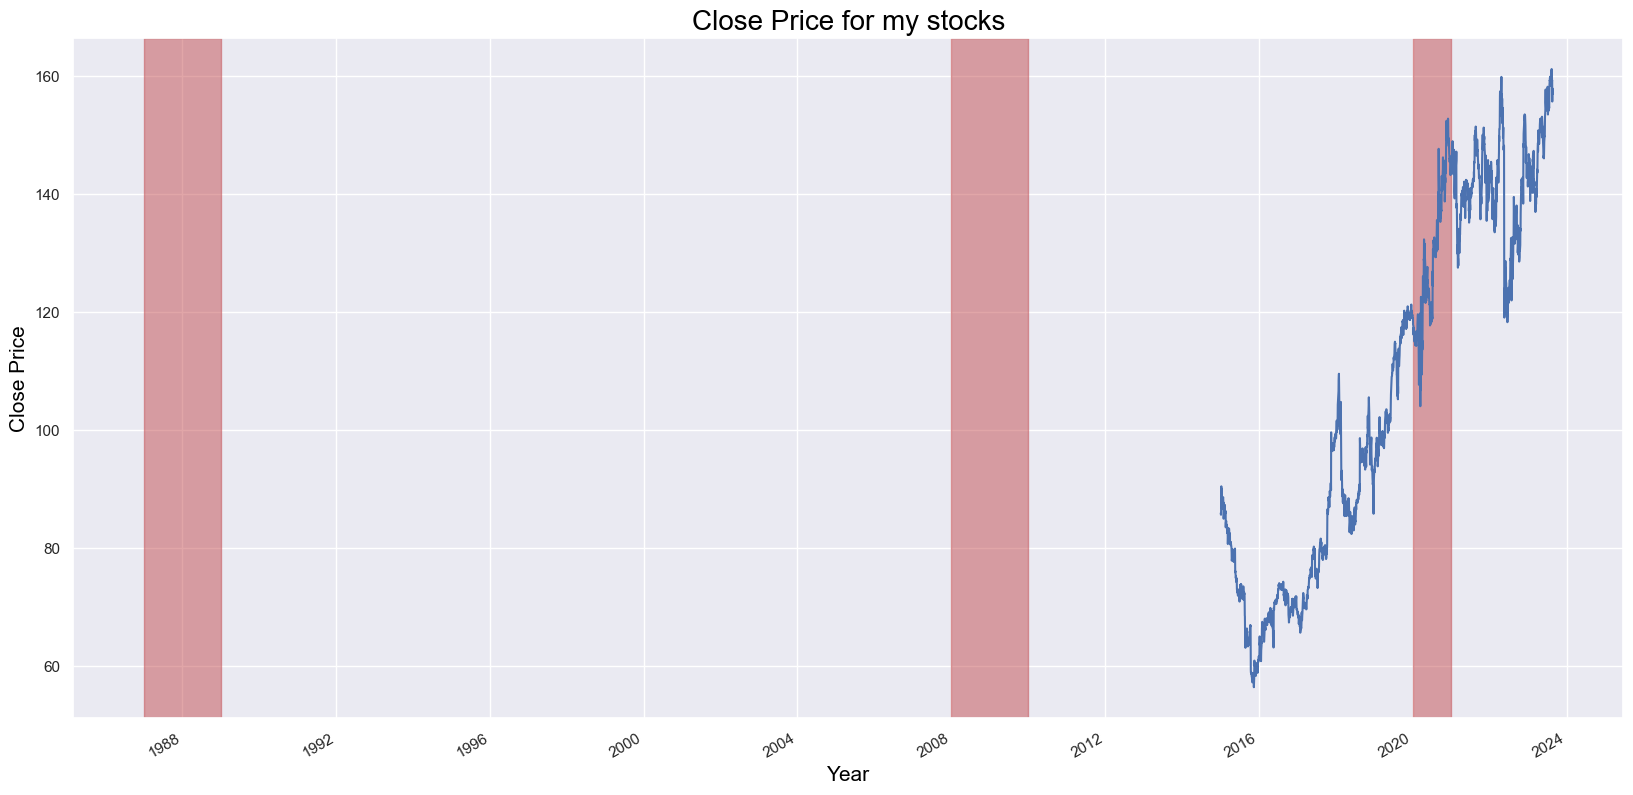

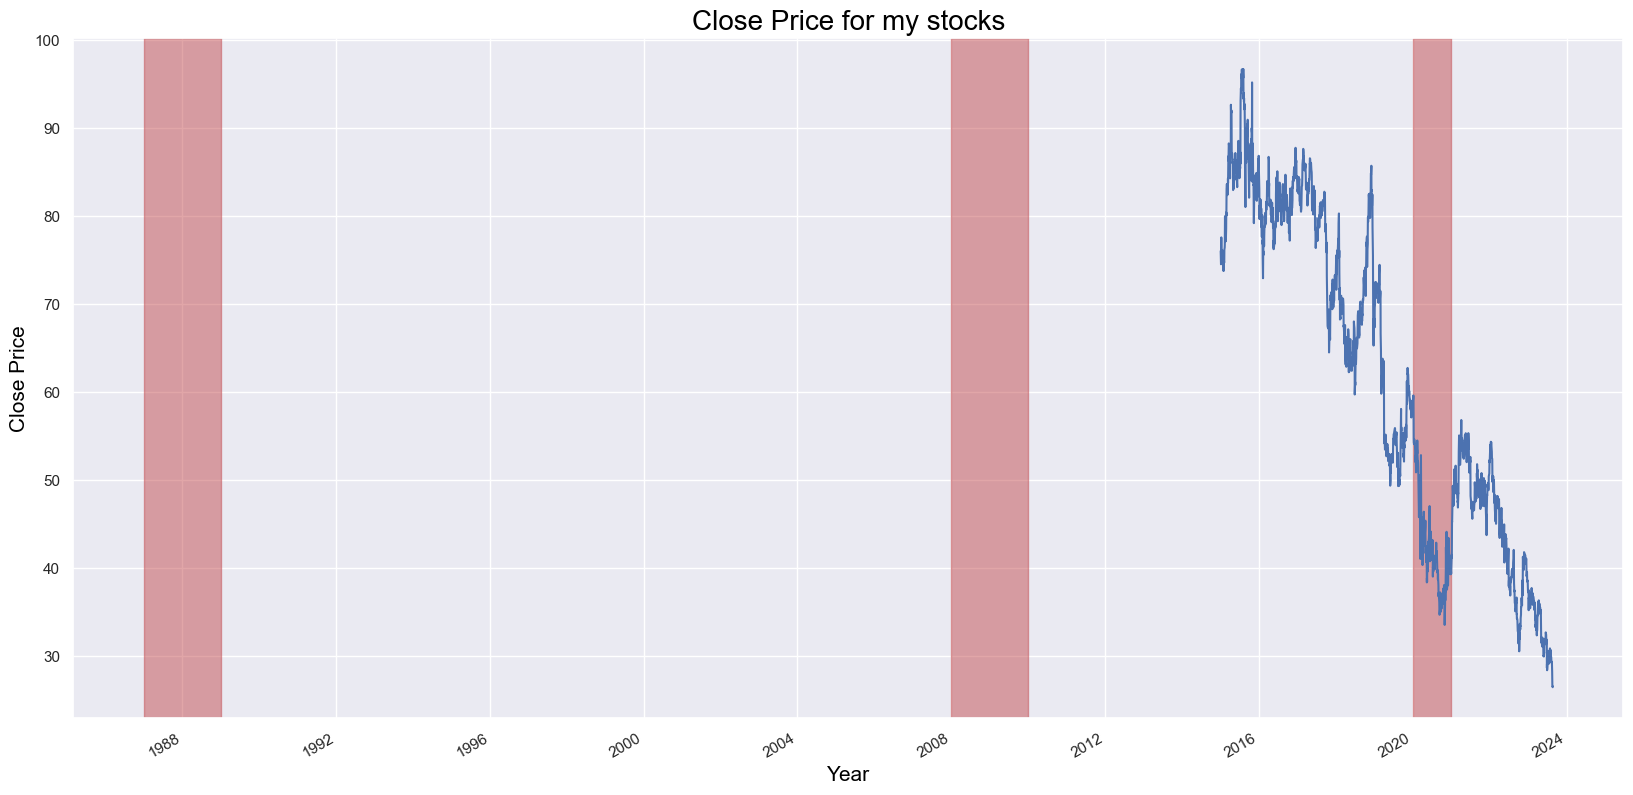

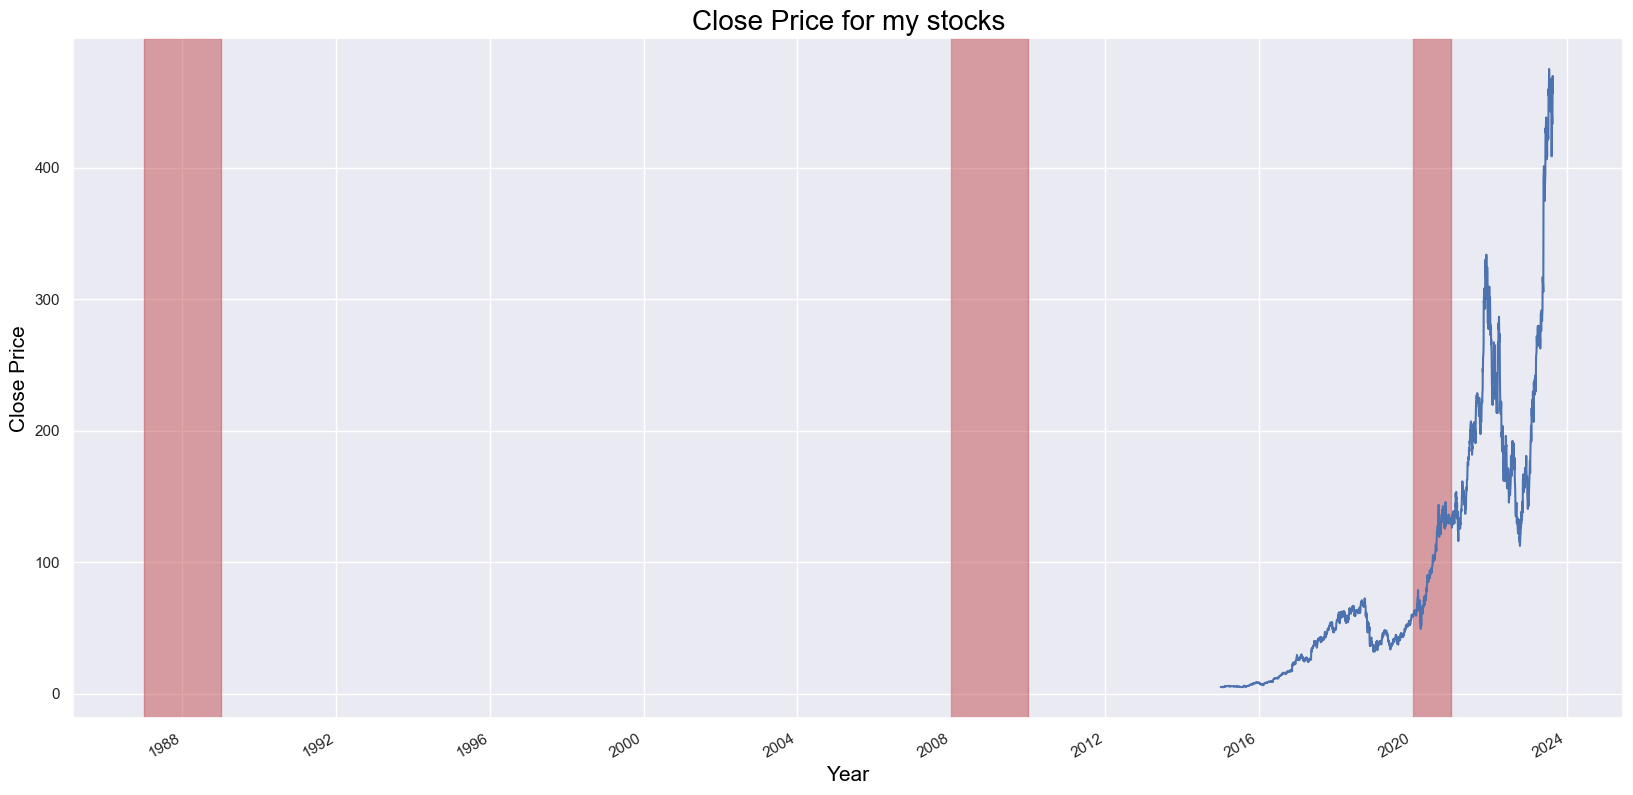

In [3]:
def myStock_plot():
    for tick in tickers:
        my_stocks[tick]['Close'].plot(grid = True)
        sns.set(rc={'figure.figsize':(20, 10)})
        plt.axvspan('1987','1989',color='r',alpha=.5)
        plt.axvspan('2008','2010',color='r',alpha=.5)
        plt.axvspan('2020','2021',color='r',alpha=.5)
        plt.title('Close Price for my stocks', color = 'black', fontsize = 20)
        plt.xlabel('Year', color = 'black', fontsize = 15)
        plt.ylabel('Close Price', color = 'black', fontsize = 15)
        plt.show();

myStock_plot()
     

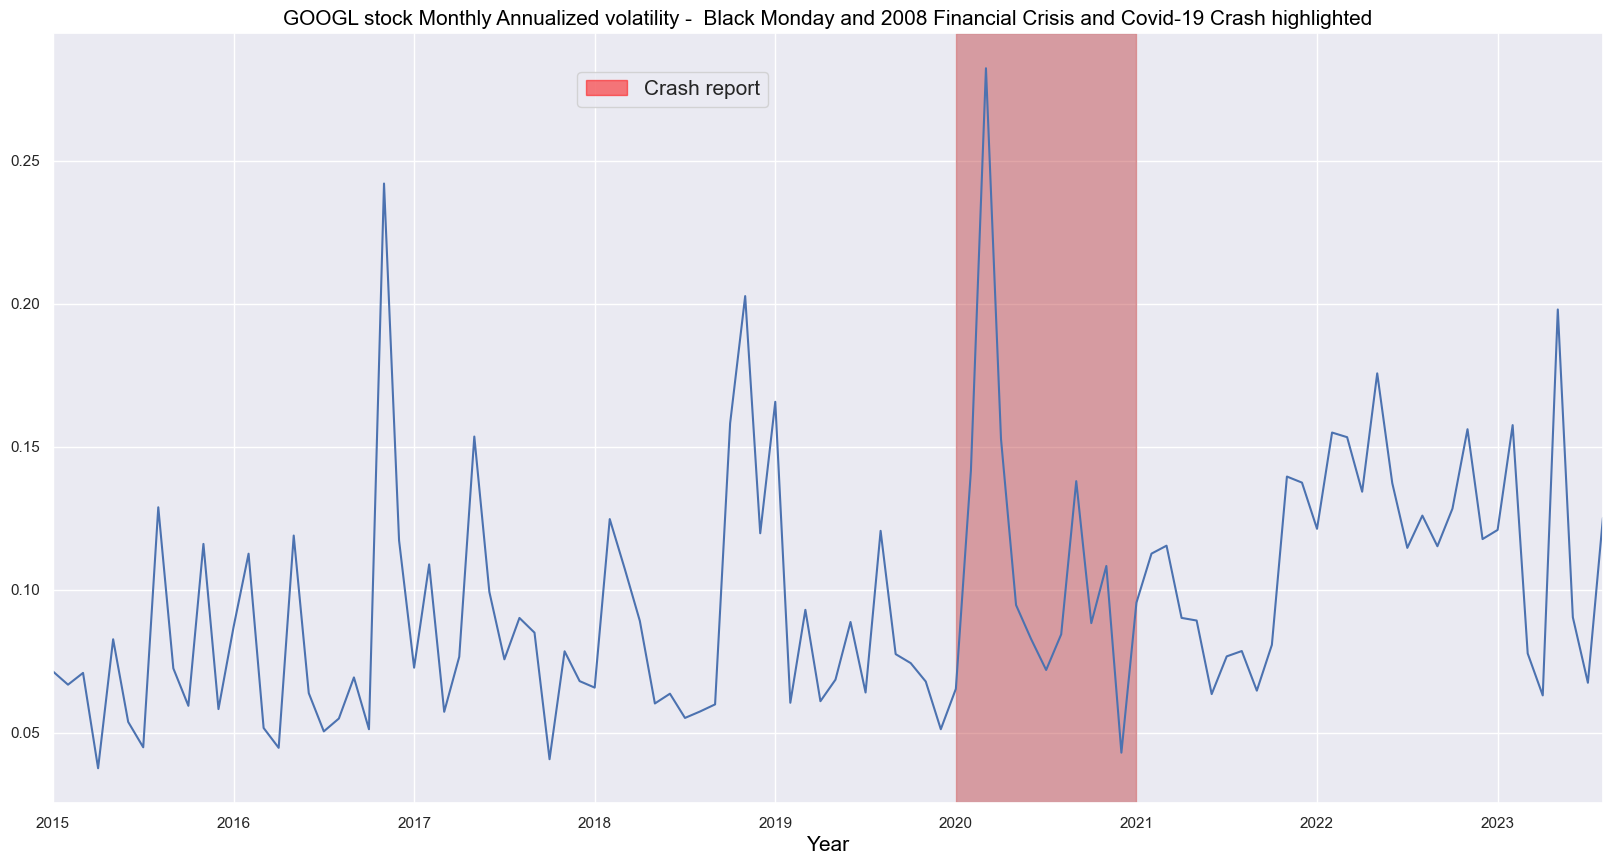

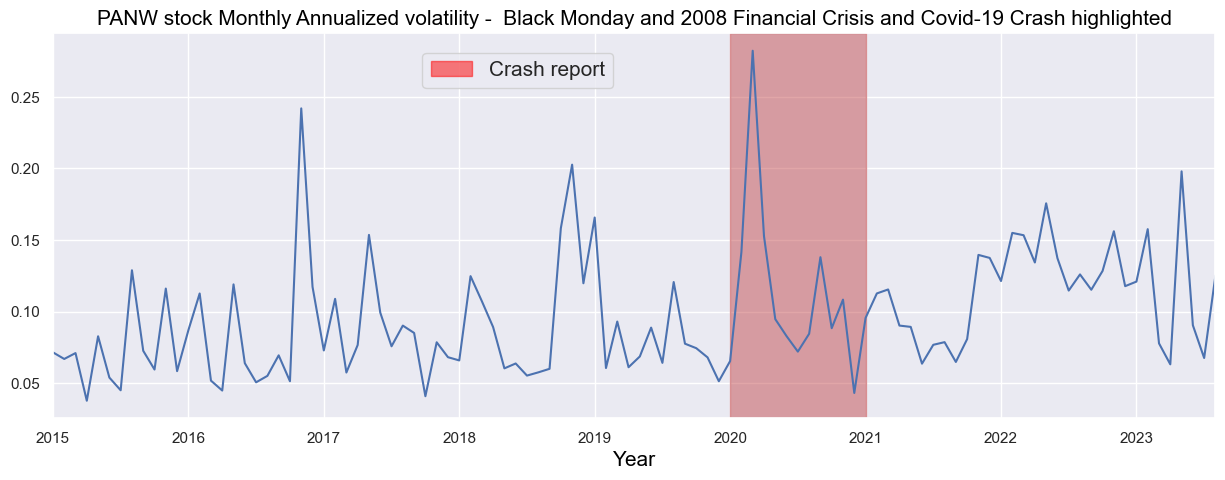

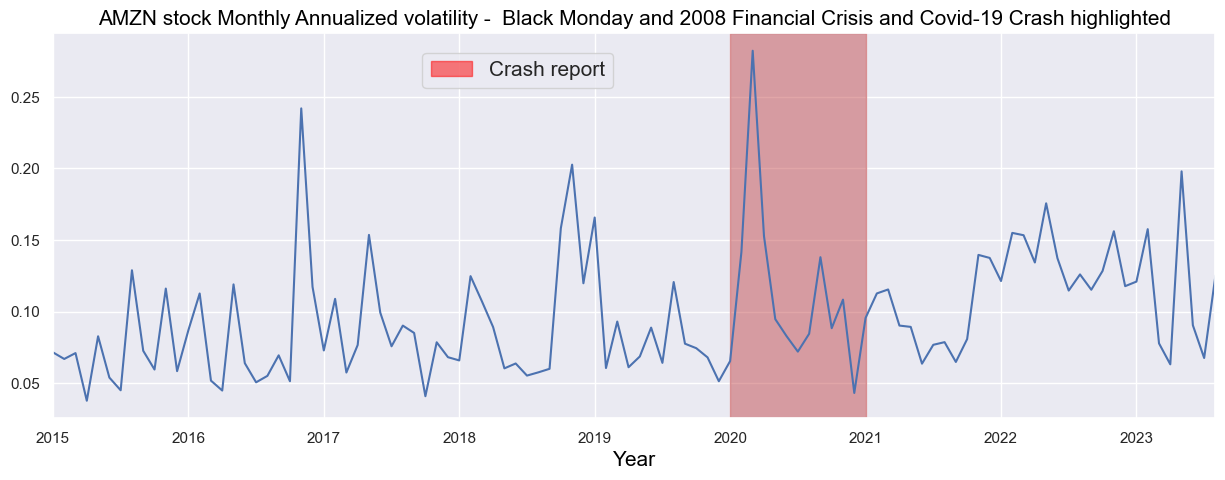

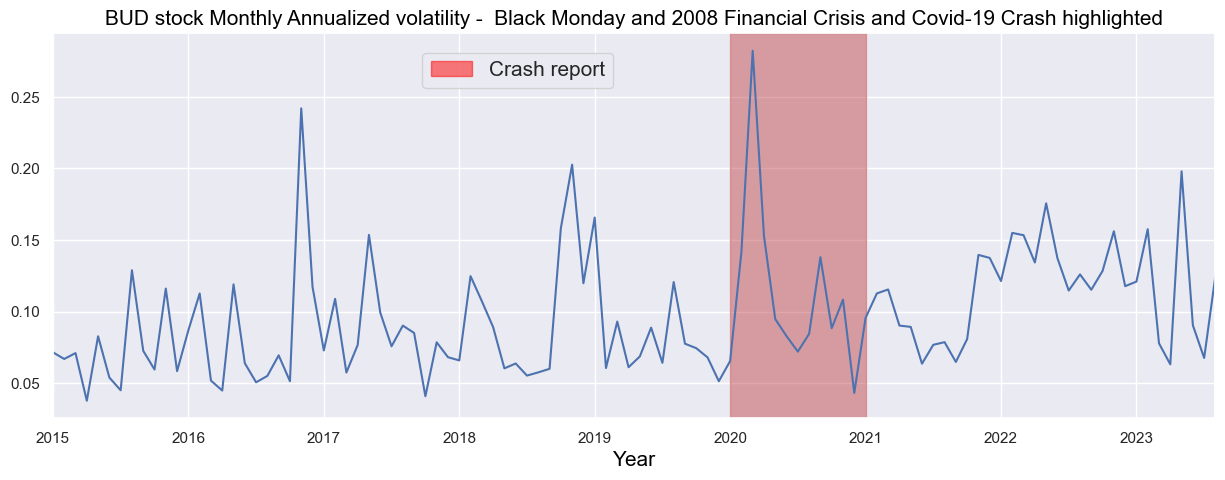

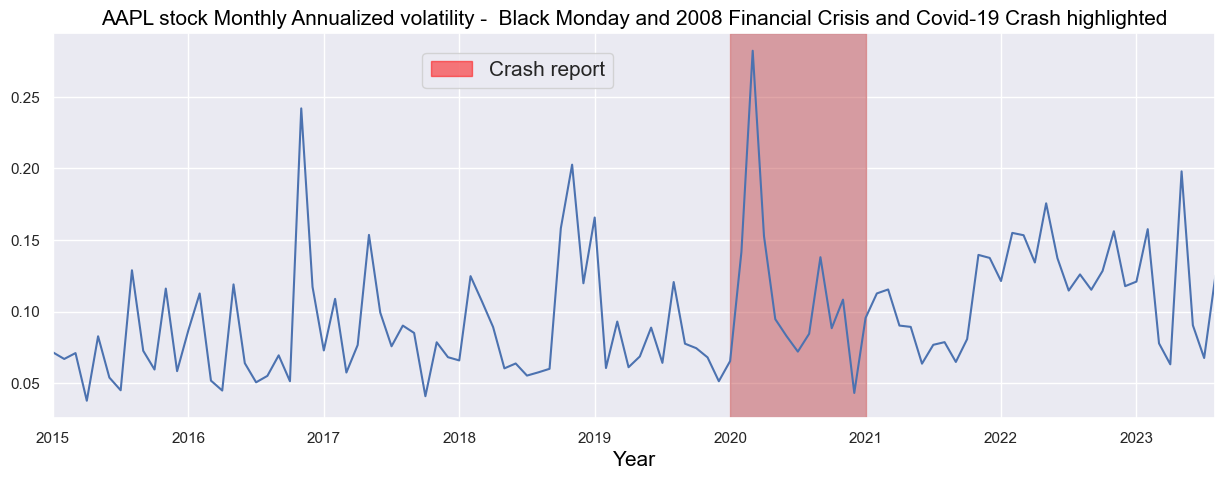

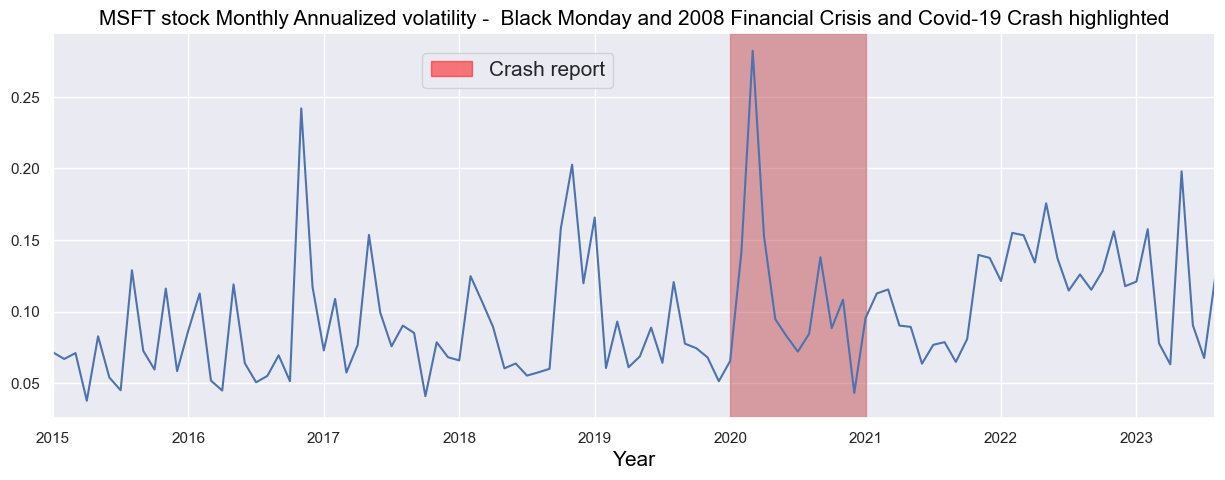

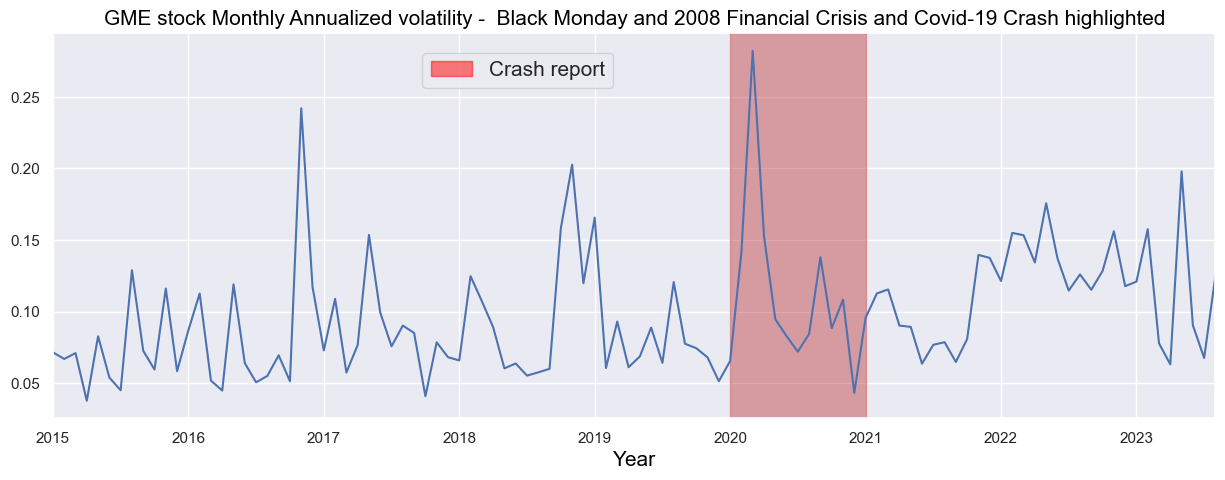

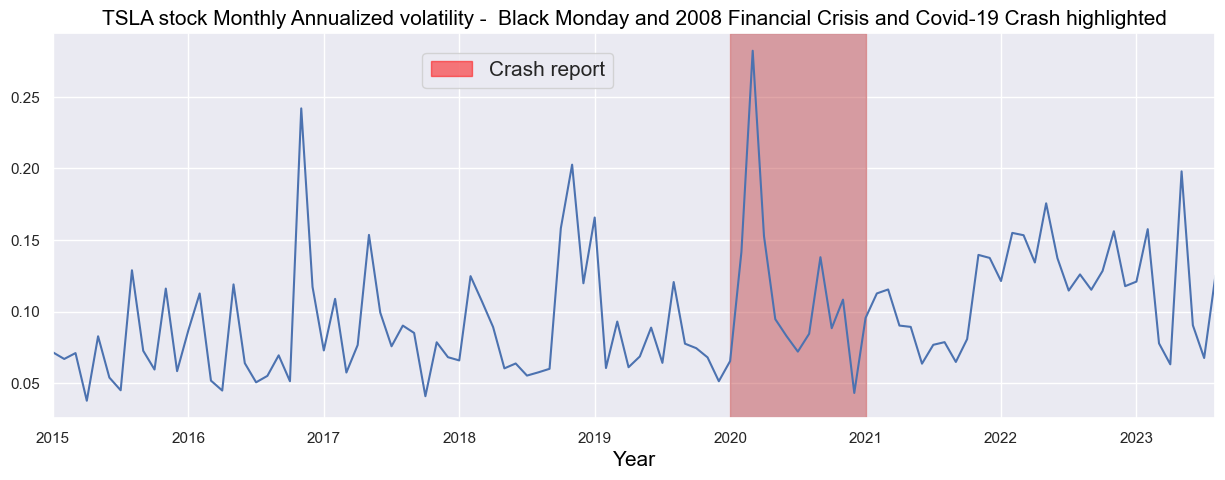

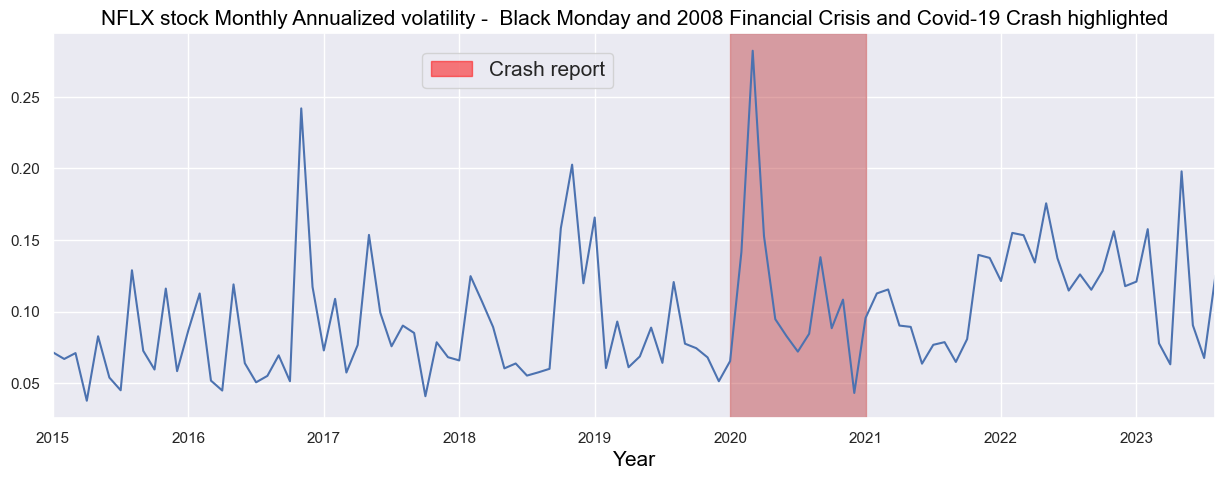

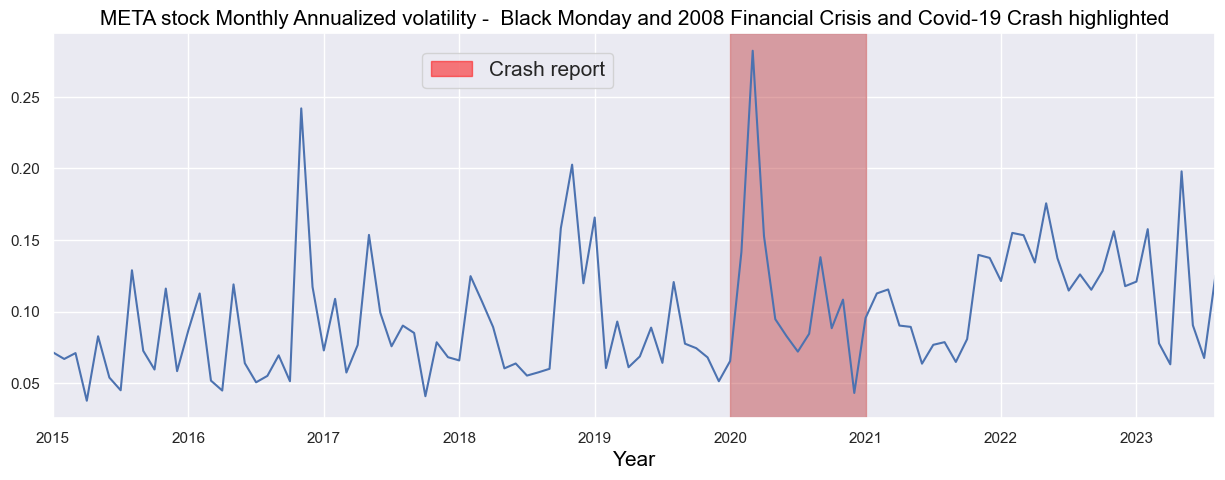

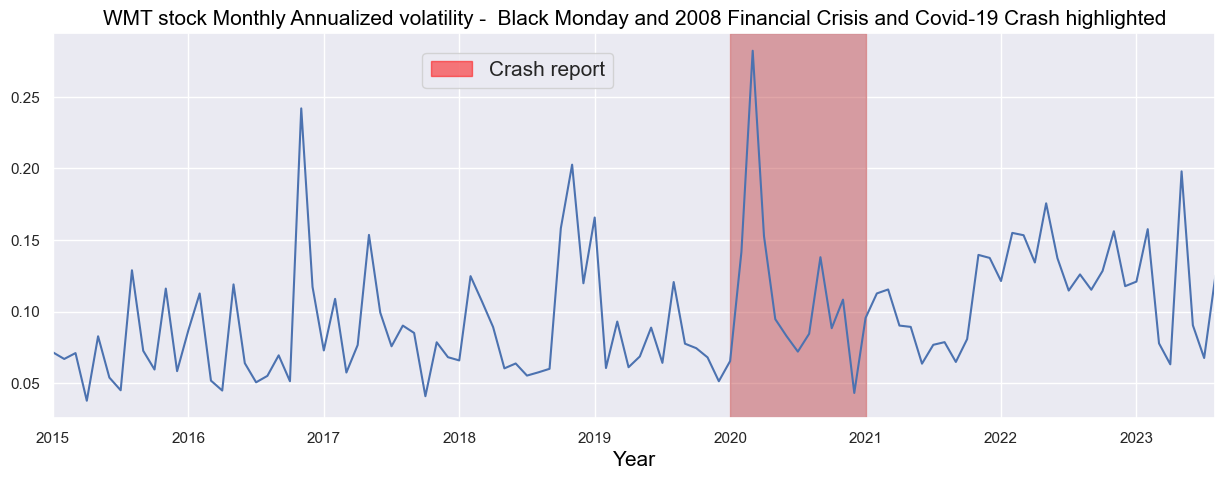

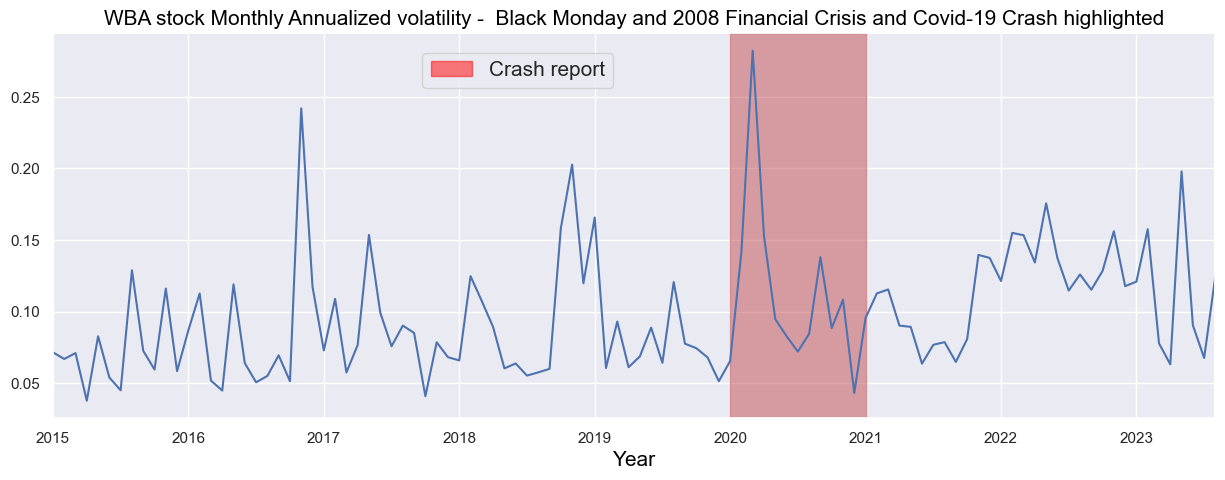

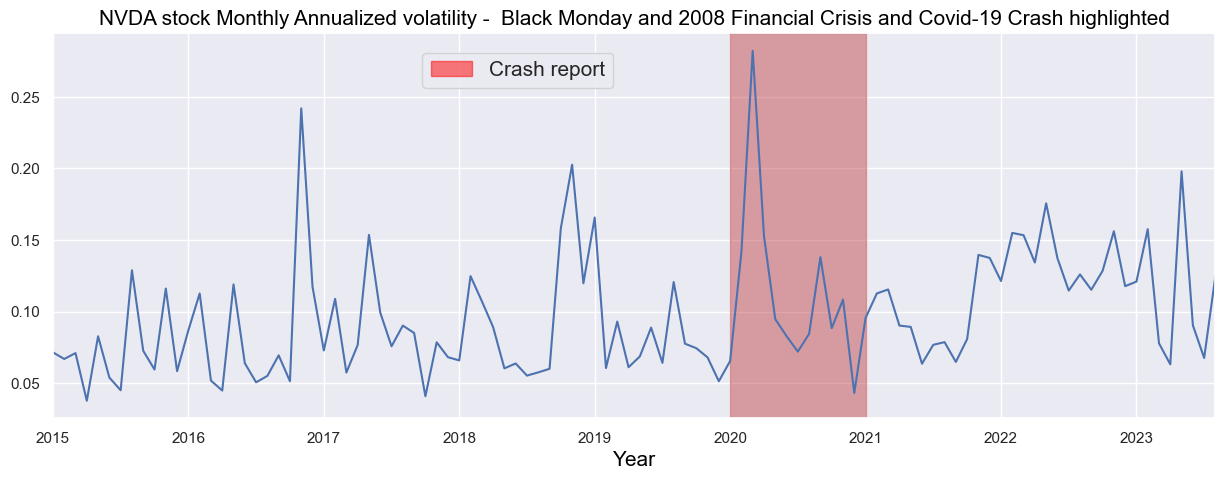

In [4]:
daily_returns = []
for tick in tickers:
    daily_returns = my_stocks[tick]['Close'].pct_change()
    # Drop the first value which becomes a 'NaN' as there is no price change from the day before.
    daily_returns.dropna(inplace=True)
# Daily precentage change
daily_returns.head()
monthly_annu = daily_returns.resample('M').std()* np.sqrt(12)

monthly_annu.head()
def f1():
    for tick in tickers:
        monthly_annu.plot(grid = True)
        sns.set(rc={'figure.figsize':(15, 5)})
        plt.axvspan('1987','1989',color='r',alpha=.5)
        plt.axvspan('2008','2010',color='r',alpha=.5)
        plt.axvspan('2020','2021',color='r',alpha=.5)
        labs = mpatches.Patch(color='red',alpha=.5, label="Crash report")
        plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.95), loc='upper center', borderaxespad=0.)
        plt.title(f'{tick} stock Monthly Annualized volatility -  Black Monday and 2008 Financial Crisis and Covid-19 Crash highlighted', color = 'black', fontsize = 15)
        plt.xlabel('Year', color = 'black', fontsize = 15)
        plt.show();
f1()

In [5]:
ranked = monthly_annu.groupby(monthly_annu.index.year).rank()

# average the ranks over all years for each month
final = ranked.groupby(ranked.index.month).mean()

final.describe()

count    12.000000
mean      6.356481
std       1.894334
min       2.555556
25%       5.437500
50%       6.166667
75%       7.472222
max       9.750000
Name: Close, dtype: float64

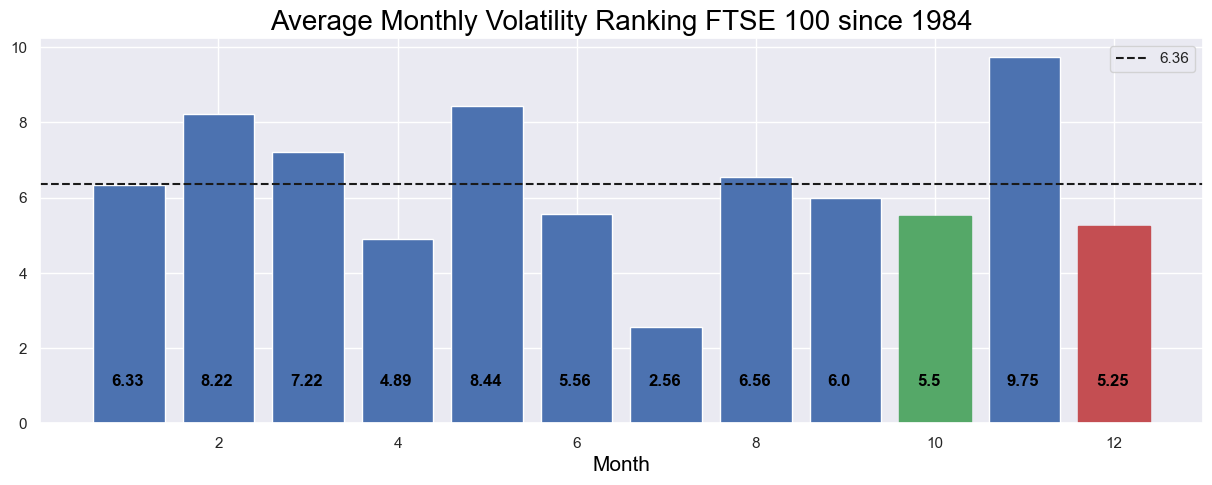

In [6]:
b_plot = plt.bar(x=final.index,height=final)
b_plot[9].set_color('g')
b_plot[11].set_color('r')
for i,v in enumerate(round(final,2)):
    plt.text(i+.8,1,str(v), color='black', fontweight='bold')
plt.axhline(final.mean(),ls='--',color='k',label=round(final.mean(),2))
plt.title('Average Monthly Volatility Ranking FTSE 100 since 1984', color = 'black', fontsize = 20)
plt.xlabel('Month', color = 'black', fontsize = 15)
plt.legend()
plt.show()

## Hypothesis Testing

Hypothesis testing helps us determine whether the observed effect in our data is real or could happen simply by chance. The general process involves the following steps:

1. Choose an Appropriate Test Statistic
   - A test statistic is a numerical summary of the data that we use to compare with theoretical distributions.

2. Construct a Null Hypothesis (H0)
   - The null hypothesis is a statement of no effect or no difference between groups.

3. Compute a p-value
   - The p-value is a measure of how likely we would observe the observed effect or more extreme results under the assumption that the null hypothesis is true.

### Example

Let's say we want to test whether a new drug is effective in reducing blood pressure compared to a placebo.

**Step 1: Choose a Test Statistic**
- We could choose the mean difference in blood pressure between the drug group and the placebo group.

**Step 2: Construct a Null Hypothesis (H0)**
- H0: There is no difference in mean blood pressure between the drug and placebo groups.

**Step 3: Compute a p-value**
- We collect data from both groups and calculate the mean difference in blood pressure.
- We simulate the distribution of mean differences under the assumption that the null hypothesis is true.
- We calculate the probability of observing a mean difference as extreme as or more extreme than the observed difference. This is the p-value.

If the p-value is small (typically below a pre-defined significance level like 0.05), we reject the null hypothesis, suggesting that the observed effect is unlikely due to chance alone. Otherwise, if the p-value is large, we fail to reject the null hypothesis, suggesting that the observed effect could be explained by random variation.

Hypothesis testing helps us make informed decisions based on data and provides a framework for drawing conclusions about populations from sample data.


In [7]:
daily_returns

Date
2015-01-05   -0.016890
2015-01-06   -0.030318
2015-01-07   -0.002606
2015-01-08    0.037618
2015-01-09    0.004028
                ...   
2023-08-16   -0.010332
2023-08-17   -0.003265
2023-08-18   -0.001038
2023-08-21    0.084713
2023-08-22   -0.027658
Name: Close, Length: 2173, dtype: float64

In [8]:
# Null Data Set
new_df_sim = pd.DataFrame()
highest_only = []

count=0
n = 1000  # Number of simulations
sample_size = min(9414, len(daily_returns))  # Adjust sample size based on available data

for i in range(n):
    daily_returns_shuffle = daily_returns.sample(sample_size, replace=True).reset_index(drop=True)
    daily_returns_shuffle.index = pd.bdate_range(start='2015-1-1', periods=sample_size)

    monthly_annu = daily_returns_shuffle.resample('M').std() * np.sqrt(12)
    
    ranked = monthly_annu.groupby(monthly_annu.index.year).rank()
    sim_final = ranked.groupby(ranked.index.month).mean()
    
    # Add each of the 1000 simulations to the DataFrame
    new_df_sim = pd.concat([new_df_sim, sim_final], axis=1)
    
    # Also record just the highest AMVR for each year 
    maxi_month = max(sim_final)
    highest_only.append(maxi_month)

# Calculate absolute deviation in AMVR from the mean
all_months = new_df_sim.values.flatten()
mu_all_months = all_months.mean()
abs_all_months = abs(all_months - mu_all_months)    

# Calculate absolute deviation in highest only AMVR from the mean
mu_highest = np.mean(highest_only)
abs_highest = [abs(x - mu_all_months) for x in highest_only]



## P Value

In [9]:
count=0
fin = abs(final - final.mean())
print(fin.sort_values())
Oct_value = fin[10]
Dec_value = fin[12]
for i in abs_all_months:
    if i> Oct_value:
        count+=1
ans = count/len(abs_all_months)        
print('p-value:', ans )

Date
1     0.023148
8     0.199074
9     0.356481
6     0.800926
10    0.856481
3     0.865741
12    1.106481
4     1.467593
2     1.865741
5     2.087963
11    3.393519
7     3.800926
Name: Close, dtype: float64
p-value: 0.48591666666666666


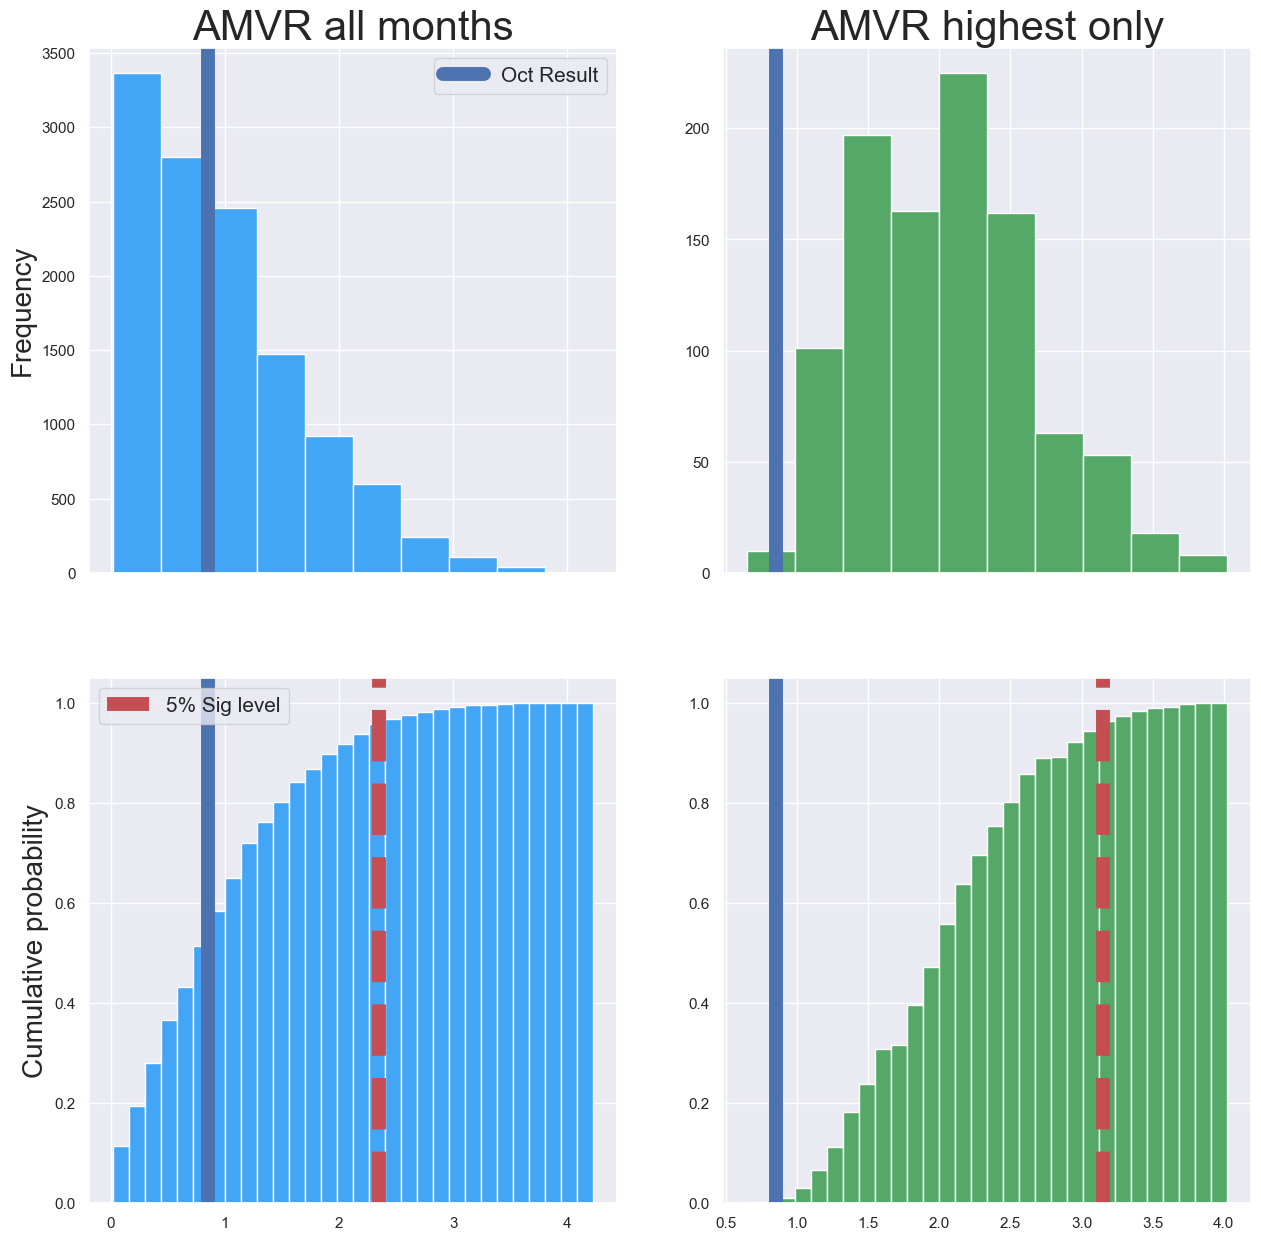

In [10]:
abs_all_months_95 = np.quantile(abs_all_months,.95)
abs_highest_95 = np.quantile(abs_highest,.95)

# Plot AMVR all months in left column and AMVR highest only in right column
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex='col',figsize=(15,15))


#plot 1 AMVR all months
ax1.hist(abs_all_months,histtype='bar',color='#42a5f5')
ax1.set_title('AMVR all months',fontsize=30)
ax1.set_ylabel('Frequency',fontsize=20)
n,bins,patches = ax3.hist(abs_all_months,density=1,histtype='bar',cumulative=True,bins=30,color='#42a5f5')
ax3.set_ylabel('Cumulative probability',fontsize=20)
ax1.axvline(Oct_value,color='b',label='Oct Result',lw=10)
ax3.axvline(Oct_value,color='b',lw=10)
ax3.axvline(abs_all_months_95,color='r',ls='--',label='5% Sig level',lw=10)


#plot 2 AMVR highest only
ax2.hist(abs_highest,histtype='bar',color='g')
ax2.set_title('AMVR highest only',fontsize=30)
ax2.axvline(Oct_value,color='b',lw=10)
n,bins,patches = ax4.hist(abs_highest,density=1,histtype='bar',cumulative=True,bins=30,color='g')
ax4.axvline(Oct_value,color='b',lw=10)
ax4.axvline(abs_highest_95,color='r',ls='--',lw=10)

ax1.legend(fontsize=15)
ax3.legend(fontsize=15);